<a href="https://colab.research.google.com/github/soultanyousif/background-substraction/blob/main/background_substraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

video_path = "/content/Cars Moving On Road Stock Footage - Free Download.mp4"

cap = cv2.VideoCapture(video_path)

subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

frame_count = 0
display_interval = 5


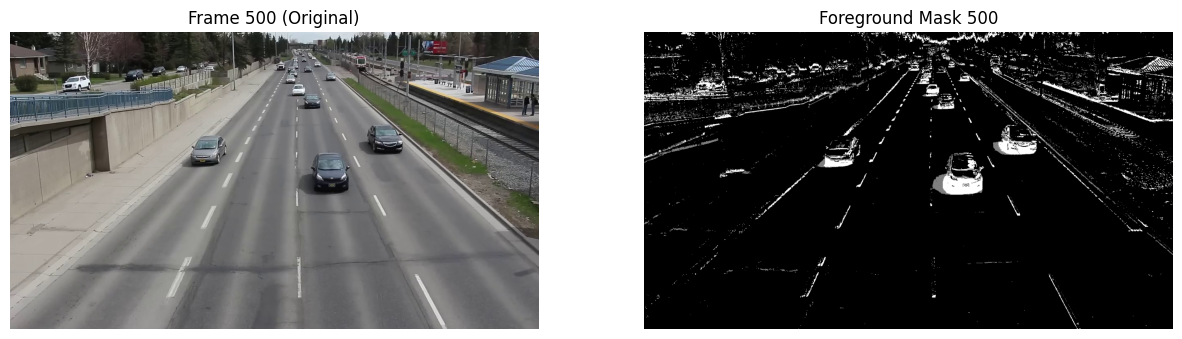

Stopping after 500 frames
Total frames processed: 501


In [5]:
while True:
    ret, frame = cap.read()

    if not ret:
        print("End of video stream.")
        break


    mask = subtractor.apply(frame)


    if frame_count % display_interval == 0:

        clear_output(wait=True)


        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


        fig, axes = plt.subplots(1, 2, figsize=(15, 6))


        axes[0].imshow(frame_rgb)
        axes[0].set_title(f"Frame {frame_count} (Original)")
        axes[0].axis('off')


        axes[1].imshow(mask, cmap='gray')
        axes[1].set_title(f"Foreground Mask {frame_count}")
        axes[1].axis('off')

        plt.show()

    frame_count += 1


    if frame_count > 500:
        print("Stopping after 500 frames")
        break

cap.release()
print(f"Total frames processed: {frame_count}")